In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import cv2
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
img = image.load_img("train/Cat/6.jpg")

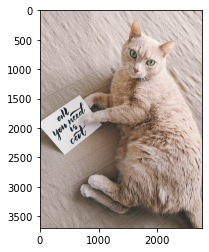

In [3]:
plt.imshow(img)

In [4]:
cv2.imread("train/Cat/6.jpg")

array([[[191, 193, 204],
        [189, 191, 202],
        [191, 193, 204],
        ...,
        [184, 188, 199],
        [178, 182, 193],
        [179, 183, 194]],

       [[201, 203, 214],
        [196, 198, 209],
        [194, 196, 207],
        ...,
        [200, 204, 215],
        [199, 203, 214],
        [200, 204, 215]],

       [[208, 210, 221],
        [198, 200, 211],
        [193, 195, 206],
        ...,
        [209, 213, 224],
        [211, 215, 226],
        [210, 214, 225]],

       ...,

       [[159, 165, 176],
        [163, 169, 182],
        [166, 172, 185],
        ...,
        [164, 171, 198],
        [143, 153, 177],
        [137, 147, 171]],

       [[161, 167, 178],
        [165, 171, 182],
        [167, 173, 186],
        ...,
        [171, 178, 205],
        [153, 163, 187],
        [148, 158, 182]],

       [[165, 171, 182],
        [167, 173, 184],
        [167, 173, 184],
        ...,
        [174, 181, 208],
        [159, 169, 193],
        [155, 165, 189]]

In [5]:
cv2.imread("train/Cat/6.jpg").shape

(3696, 2765, 3)

In [6]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [7]:
train_dataset = train.flow_from_directory('train/',
                                         target_size= (250,250),
                                         batch_size = 3,
                                         class_mode = 'binary')

Found 48 images belonging to 2 classes.


In [8]:
validation_dataset = validation.flow_from_directory('validation/',
                                         target_size= (250,250),
                                         batch_size = 3,
                                         class_mode = 'binary')

Found 38 images belonging to 2 classes.


In [9]:
train_dataset.class_indices

{'Cat': 0, 'Dog': 1}

In [10]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [11]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape =(250,250,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #First convolutional layer with 16 filters
                                  tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #Second convolutional layer with 32 filters
                                  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #Second convolutional layer with 64 filters
                                  tf.keras.layers.Flatten(),
                                  #Flattening layer
                                  tf.keras.layers.Dense(208,activation = 'relu'),
                                  #Dense layer
                                  tf.keras.layers.Dense(1,activation='sigmoid')
                                  ])

In [12]:
model.compile(loss='binary_crossentropy',
             optimizer= RMSprop(lr=0.001),
             metrics=['accuracy'])

In [ ]:
model_fit=model.fit(train_dataset,
                   steps_per_epoch=3,
                   epochs=12,
                   validation_data=validation_dataset)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 3 steps, validate for 13 steps
Epoch 1/12
3/3 [==============================] - 16s 5s/step - loss: 7.9061 - accuracy: 0.3333 - val_loss: 0.9507 - val_accuracy: 0.5000
Epoch 2/12
3/3 [==============================] - 14s 5s/step - loss: 0.8114 - accuracy: 0.4444 - val_loss: 0.9030 - val_accuracy: 0.5000
Epoch 3/12
2/3 [===================>..........] - ETA: 1s - loss: 5.2888 - accuracy: 0.6667

In [25]:
model_fit=model.fit(train_dataset,
                   steps_per_epoch=3,
                   epochs=12,
                   validation_data=validation_dataset)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 3 steps, validate for 13 steps
Epoch 1/12
3/3 [==============================] - 13s 4s/step - loss: 0.5897 - accuracy: 0.8889 - val_loss: 2.0399 - val_accuracy: 0.5000
Epoch 2/12
3/3 [==============================] - 11s 4s/step - loss: 0.8126 - accuracy: 0.7778 - val_loss: 0.6663 - val_accuracy: 0.5526
Epoch 3/12
3/3 [==============================] - 13s 4s/step - loss: 0.5727 - accuracy: 0.6667 - val_loss: 0.7184 - val_accuracy: 0.6316
Epoch 4/12
3/3 [==============================] - 13s 4s/step - loss: 0.5631 - accuracy: 0.5556 - val_loss: 0.6918 - val_accuracy: 0.5000
Epoch 5/12
3/3 [==============================] - 14s 5s/step - loss: 0.4420 - accuracy: 0.7778 - val_loss: 2.1742 - val_accuracy: 0.5000
Epoch 6/12
3/3 [==============================] - 13s 4s/step - loss: 1.0362 - accuracy: 0.6667 - val_loss: 0.7079 - val_accuracy: 0.5263
Epoch 7/12
3/3 [==============================] - 13s 4s/step - loss: 0.4929 - ac

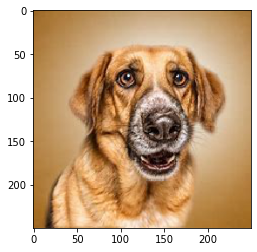

This is a Dog


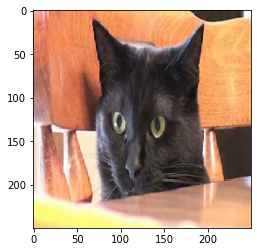

This is a Cat


In [33]:
dir_path = 'test'

for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+'//' + i, target_size=(250,250))
    plt.imshow(img)
    plt.show()
    
    X=image.img_to_array(img)
    X = np.expand_dims(X,axis =0)
    images= np.vstack([X])
    val=model.predict(images)
    if val ==0:
        print("This is a Dog")
    else:
        print("This is a Cat")